# Email Spam Classifier Project Analysis:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [28]:
espam=pd.read_csv(r"C:\Users\User\Downloads\Email_Spam.csv")
espam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ?_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
espam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning:-

In [29]:
# dropping irrelevant columns

espam=espam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [30]:
espam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
espam.shape

(5572, 2)

In [14]:
espam.columns

Index(['v1', 'v2'], dtype='object')

In [31]:
# Changing column names to proper one

espam=espam.rename(columns={'v1':'Category','v2':'Message'})

In [32]:
espam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ?_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [33]:
espam.columns

Index(['Category', 'Message'], dtype='object')

In [34]:
espam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category    0
Message     0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


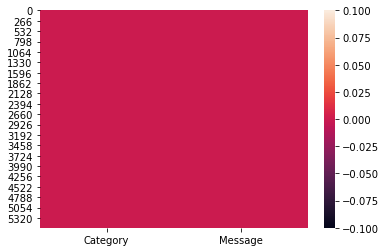

In [37]:
# checking the null values

# checking null values

print(espam.isnull().sum())

print(sns.heatmap(espam.isnull()))
plt.show()

Above observations and heatmap shows that there are no null/missing values present in the dataset.

# EDA and Data Visualization:-

In [38]:
espam['Spam']=espam['Category'].apply(lambda x:1 if x=='spam' else 0)

In [39]:
espam

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ?_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [40]:
espam.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

In [41]:
espam.dtypes

Category    object
Message     object
Spam         int64
dtype: object

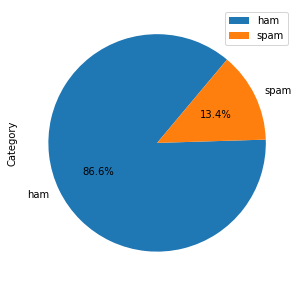

In [43]:
pie_churn = pd.DataFrame(espam['Category'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', 
                   figsize = (15,5), startangle= 50)

# Unsquish the pie.

plt.gca().set_aspect('equal')

plt.show()

The pie chart shows that the 'ham'('valid message') has higher rate as compared to that of 'spam'('fraud message'), therefore 
the risk is less in terms of Email.

# Pre-Processing the dataframe:-

In [47]:
x=espam['Message']

In [48]:
# Target Variable

y=espam['Spam']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Convert text to vectors

In [50]:
#CounterVectorizer Convert the text into matrics

from sklearn.feature_extraction.text import CountVectorizer

# Modelling Phase

In [56]:
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation and Prediction

In [57]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [58]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [60]:
# Predicting the Email

emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign,e. g. HORO ARIES'
]

In [61]:
clf.predict(emails)

array([0, 1], dtype=int64)

Here I have given Two emails for detection in which the 1st One is looking valid and the other one looking spam as per the 
result.

In [62]:
clf.score(X_test,y_test)

0.9834888729361091

So, we are getting our model accuracy 98.3% means that our model is working well.

# Saving the Model

In [64]:
import pickle
filename='Email_Spam_Detection.pkl'
pickle.dump(clf,open(filename,'wb'))

# Conclusion and Insights

We have been succesfully able to reach the target for classifying Spam Messages. However would like to highlight a 
few points as mentioned below:
    

1. Email has been the most important medium of communication nowadays, through internet connectivity any message can be 
   delivered to all aver the world. More than 270 billion emails are exchanged daily, about 57% of these are just spam emails. 
   Spam emails, also known as non-self, are undesired commercial or malicious emails, which affects or hacks personal 
   information like bank ,related to money or anything that causes destruction to single individual or a corporation or a group
   of people. Spam is a serious issue that is not just annoying to the end-users but also financially damaging and a security
   risk. Hence this system is designed in such a way that it detects unsolicited and unwanted emails and prevents them hence 
   helping in reducing the spam message which would be of great benefit to individuals as well as to the company .
    
 
2. In Data Analysis, I have specified Category, Message and Spam. with the visualization of Category, it is observed that the 
   rate of 'ham' messages is much more than that of 'spam' messages. Thus, the risk is less.   